## Titanic :

### Data acquisition : 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preprocessing

#### the number of rows and columns 

In [4]:
df.shape

(891, 12)

In [5]:
print('Number of rows : ',df.shape[0])
print()
print('Number of columns : ',df.shape[1])

Number of rows :  891

Number of columns :  12


#### get some informations about variables 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Null values in data : 

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
print('the column Age has  ',df.isnull().sum()[5],' null value')

the column Age has   177  null value


In [15]:
print('the column Cabin has  ',df.isnull().sum()[10],' null value')

the column Cabin has   687  null value


In [17]:
print('the column Embarked has  ',df.isnull().sum()[11],' null value')

the column Embarked has   2  null value


#### Handling null values : 

In [18]:
# replacing null values with mean : 

In [19]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [21]:
df['Age'].isnull().sum()

0

In [22]:
# almost of values in the column Cabin are null so it's better to remove this column because it doesn't make sense

In [23]:
df=df.drop('Cabin',axis=1)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [25]:
# Embarked has 2 null values  we will replace them with the median : 

In [28]:
df['Embarked'].mode()

0    S
dtype: object

In [29]:
df['Embarked'].mode()[0]

'S'

In [30]:
# the mode is 'S' :

In [31]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [32]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [33]:
df['Embarked'].isnull().sum()

0

In [34]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

 #### statistical info about datasets [ Numerical ]

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


####  Encode cathegorical variables :

In [38]:
## Embarked --- Sex 

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
Label_=LabelEncoder()

In [39]:
df['Sex']=Label_.fit_transform(df['Sex'])

In [40]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [42]:
#1 ---> male 
#0 ---> female 

In [43]:
df['Embarked']=Label_.fit_transform(df['Embarked'])

In [44]:
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [45]:
# S --> 2 
# C --> 0
# Q --> 1

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


## EDA 

### Data visualization :

In [49]:
## The number of survivors male/female :

In [50]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [51]:
print('Number of survivors among male :  ',df['Survived'].value_counts()[1])

Number of survivors among male :   342


In [52]:
print('Number of survivors among female :  ',df['Survived'].value_counts()[0])

Number of survivors among female :   549


#### count plot for the column 'Survived':

In [53]:
import seaborn as sns

/Users/abdessalambenayyad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

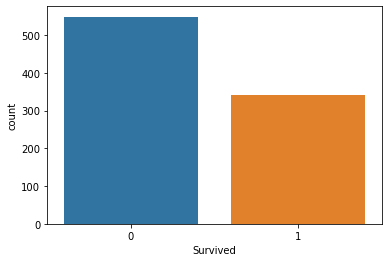

In [55]:
sns.countplot('Survived',data=df)

In [56]:
## Pclass : 

/Users/abdessalambenayyad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

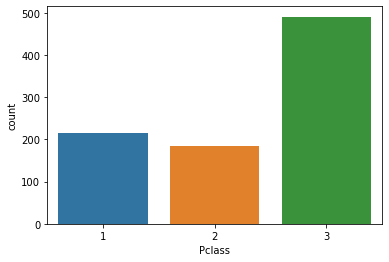

In [57]:
sns.countplot('Pclass',data=df)

In [58]:
# interpretation : number of people in pclass 3 are grather than people in class 2 and 1

In [59]:
## Embarked 

/Users/abdessalambenayyad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

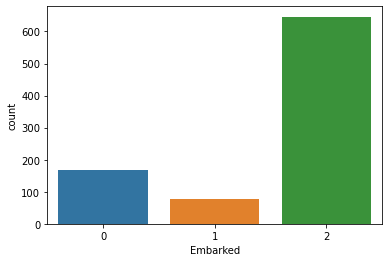

In [60]:
sns.countplot('Embarked',data=df)

In [63]:
## number of survived by sex 

/Users/abdessalambenayyad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

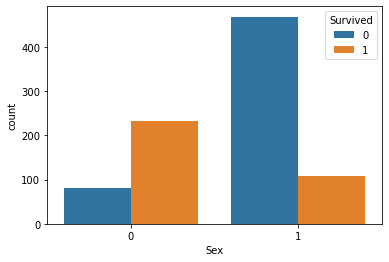

In [67]:
sns.countplot('Sex',hue='Survived',data=df)

In [71]:
# number of people who survived in different embarked  [S Q C]

/Users/abdessalambenayyad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

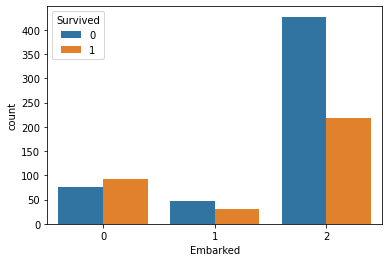

In [66]:
sns.countplot('Embarked',hue='Survived',data=df)

In [69]:
# Number of People who survived per Pclass

/Users/abdessalambenayyad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

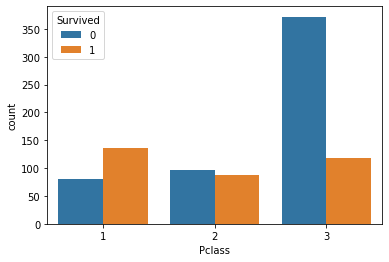

In [70]:
sns.countplot('Pclass',hue='Survived',data=df)

### Feature extraction 

In [72]:
# Correlation matrix : 

In [73]:
correlation_matrix = df.corr()

In [74]:
print(correlation_matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.331339  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.084153 -0.114631   
Age             0.033207 -0.069809 -0.331339  0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.091566  0.159651   
Embarked        0.013128 -0.167675  0.162098  0.108262 -0.026749  0.068230   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.013128  
Survived     0.081629  0.257307 -0.167675  
Pclass       0.018443 -0.549500  0.162098  
Sex         -0.245489 -0.182333  0.108262  

In [76]:
 import matplotlib.pyplot as plt

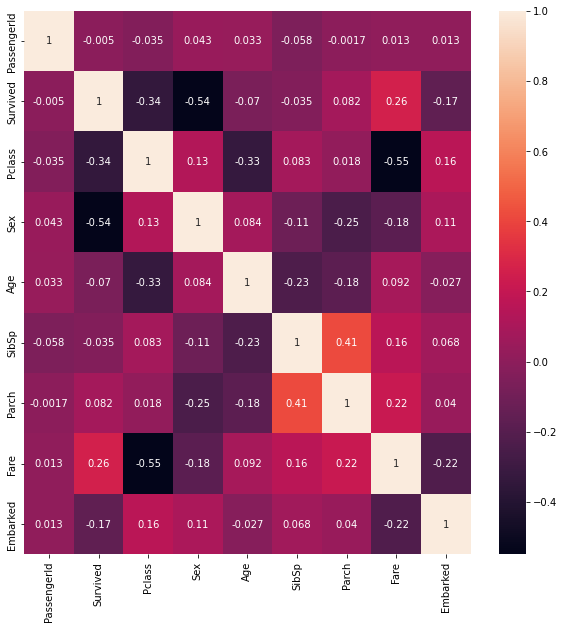

In [77]:
figure = plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [78]:
## Features most relevant : 

In [119]:
# --> Pclass -- Sex -- Age -- Embarked -- 

In [80]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,0


In [82]:
x = df.drop(['Name','Ticket','PassengerId','SibSp','Parch'],axis=1)

In [83]:
y = df['Survived']

In [88]:
x=x.drop('Survived',axis=1)

In [89]:
x

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.000000,7.2500,2
1,1,0,38.000000,71.2833,0
2,3,0,26.000000,7.9250,2
3,1,0,35.000000,53.1000,2
4,3,1,35.000000,8.0500,2
...,...,...,...,...,...
886,2,1,27.000000,13.0000,2
887,1,0,19.000000,30.0000,2
888,3,0,29.699118,23.4500,2
889,1,1,26.000000,30.0000,0


In [117]:
x=x.drop('Fare',axis=1)

In [118]:
x

,Pclass,Sex,Age,Embarked
0,3,1,22.000000,2
1,1,0,38.000000,0
2,3,0,26.000000,2
3,1,0,35.000000,2
4,3,1,35.000000,2
...,...,...,...,...
886,2,1,27.000000,2
887,1,0,19.000000,2
888,3,0,29.699118,2
889,1,1,26.000000,0


In [90]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting data test/train

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=0)

In [151]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(712, 4)
(179, 4)

(712,)
(179,)


In [152]:
from sklearn.metrics import accuracy_score

In [124]:
def model_(name_model):
    
    
    model = name_model()
    model.fit(x_train,y_train)
    prediction_train = model.predict(x_train)
    accuracy_train = accuracy_score(prediction_train,y_train)
    print('model : ',name_model, 'Accuracy on train : ',accuracy_train)
    
    
    prediction_test = model.predict(x_test)
    accuracy_test = accuracy_score(prediction_test,y_test)
    print('model : ',name_model, 'Accuracy on test : ',accuracy_test)
    
    
    
    
    

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model_(LogisticRegression)

model :  <class 'sklearn.linear_model._logistic.LogisticRegression'> Accuracy on train :  0.7907303370786517
model :  <class 'sklearn.linear_model._logistic.LogisticRegression'> Accuracy on test :  0.7988826815642458


In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [128]:
Models=[KNeighborsClassifier,RandomForestClassifier,SVC,LogisticRegression]

In [129]:
for j in Models :
    model_(j)
    

model :  <class 'sklearn.neighbors._classification.KNeighborsClassifier'> Accuracy on train :  0.8398876404494382
model :  <class 'sklearn.neighbors._classification.KNeighborsClassifier'> Accuracy on test :  0.7821229050279329
model :  <class 'sklearn.ensemble._forest.RandomForestClassifier'> Accuracy on train :  0.9030898876404494
model :  <class 'sklearn.ensemble._forest.RandomForestClassifier'> Accuracy on test :  0.8268156424581006
model :  <class 'sklearn.svm._classes.SVC'> Accuracy on train :  0.6320224719101124
model :  <class 'sklearn.svm._classes.SVC'> Accuracy on test :  0.6312849162011173
model :  <class 'sklearn.linear_model._logistic.LogisticRegression'> Accuracy on train :  0.7907303370786517
model :  <class 'sklearn.linear_model._logistic.LogisticRegression'> Accuracy on test :  0.7988826815642458


## Function to predict if you gonna survive or not on titanic

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
from sklearn.linear_model import LogisticRegression

In [161]:
def survive_or_not(Pclass,Sex,Age,Embarked):
    
    survive = [[Pclass,Sex,Age,Embarked]]
    
    # Estimator : 
    model  =  LogisticRegression()
    model.fit(x_train,y_train)
    result = model.predict(survive)
    print(result)
    if result == 1 : 
        return('You will survive :)')
    elif result == 0 :
        return('You will not survive :(')
    
    
    
    

In [162]:
survive_or_not(3,1,22,2)

[0]


'You will not survive :('